In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('robot_data/train_data.csv')

In [3]:
def oneHotEncode(df,colNames):
    for col in colNames:
        if( df[col].dtype == np.dtype('object')):
            dummies = pd.get_dummies(df[col],prefix=col)
            df = pd.concat([df,dummies],axis=1)

            #drop the encoded column
            df.drop([col],axis = 1 , inplace=True)
    return df

## Shuffle dataset 

In [3]:
df = df.sample(frac=1).reset_index(drop=True)

## encode cat features with oneHotEncoder

In [49]:
df_oh = oneHotEncode(df, ['gamma_ray'])
df_oh.head()

,year,robot_gear_compression_diff_1,weapon_robot_armour_index_2,robot_gear_compression_diff_3,robot_gear_compression_diff_4,weapon_robot_punch_right_1,robot_gear_compression_diff_6,robot_gear_compression_diff_7,robot_gear_compression_diff_8,robot_gear_compression_diff_9,...,robot_probe_temperature_7,robot_probe_temperature_8,robot_probe_temperature_9,weapon_robot_eye_laser_range_1,weapon_robot_punch_left_4,weapon_robot_punch_left_2,target,gamma_ray_high,gamma_ray_low,gamma_ray_moderate
0,2019,10.679910,15.091173,14.274428,-11.045572,-4.783722,8.581814,13.683193,5.829388,-46.055115,...,0.970255,3.238174,1.817238,1.474627,-28.059812,15.631746,19.993461,0,1,0
1,2020,10.611032,14.906948,13.773004,-11.169123,-6.077731,8.336961,13.633622,5.345224,-50.708744,...,0.728076,3.004283,1.586136,1.281429,-27.609630,15.848169,19.904883,0,1,0
2,2021,10.186666,14.807848,13.861197,-12.261832,-5.385449,8.208332,14.534426,5.352057,-53.471611,...,0.397508,3.050232,2.093176,1.791260,-25.408680,16.064592,20.422236,0,1,0
3,2022,10.439354,14.780703,13.735109,-12.940010,-3.136724,8.093524,14.911227,7.367078,-42.954456,...,2.683104,3.133879,1.799235,1.588151,-23.169179,16.281016,19.872086,0,1,0
4,2023,10.537853,14.761712,14.112636,-11.648818,-1.120589,8.359302,14.660116,7.028476,-49.266612,...,0.409917,3.240069,1.315912,0.893747,-22.344542,16.497439,19.118784,0,1,0


## encode cat fetures with simple encoder 

In [112]:
df['gamma_ray'] = df['gamma_ray'].map({'moderate': 0, 'low': 1, 'high': 2})
df.head()

,year,robot_gear_compression_diff_1,weapon_robot_armour_index_2,robot_gear_compression_diff_3,robot_gear_compression_diff_4,weapon_robot_punch_right_1,robot_gear_compression_diff_6,robot_gear_compression_diff_7,robot_gear_compression_diff_8,robot_gear_compression_diff_9,...,robot_probe_temperature_5,robot_probe_temperature_6,robot_probe_temperature_7,robot_probe_temperature_8,robot_probe_temperature_9,weapon_robot_eye_laser_range_1,weapon_robot_punch_left_4,weapon_robot_punch_left_2,gamma_ray,target
0,2443,15.107418,16.473655,16.284744,1.684729,9.085168,8.828593,12.863527,4.763955,-42.017060,...,6.514325,0.353292,-0.376138,3.058994,1.762016,1.434339,-26.315136,63.617741,1,20.425890
1,3475,13.571161,14.006828,15.645264,28.135536,15.682601,11.895263,15.666107,14.149243,12.430456,...,4.116133,4.202730,-0.313010,2.979437,2.327740,1.400359,-3.850263,-35.703812,0,16.978240
2,3256,15.623526,16.000980,18.015356,28.264272,19.782512,12.481540,17.631934,13.026515,1.820751,...,5.782085,3.858018,1.231091,3.185375,2.328432,0.924123,-14.398051,-21.939303,0,18.256093
3,4673,-15.376958,-15.722599,-20.976236,-39.852213,-35.307622,-10.836382,-19.580308,-14.054650,-47.704177,...,6.887962,3.789122,-1.160526,3.182888,2.322720,1.750972,18.822305,-20.294488,2,-8.590499
4,3650,14.597789,13.983907,16.975822,36.144174,19.333672,12.489376,16.951218,16.606430,26.903289,...,3.905647,2.240415,2.159602,3.123184,1.852206,1.093766,-7.001559,-18.649672,0,12.420576


we dont need year for training 

In [4]:
df.drop(columns=['year'], inplace=True)

In [69]:
split = 600 # train/test split ration 

# test with simple encoder 
X_test, y_test = df.iloc[:split].drop(columns=['target'], inplace=False), df.iloc[:split]['target']
# test with one hot encoder 
X_test_oh = df_oh.iloc[:split].drop(columns=['target'], inplace=False)

# train with simple encoder 
X_train, y_train= df.iloc[split:].drop(columns=['target'], inplace=False), df.iloc[split:]['target']
# train with one hot encoder 
X_train_oh = df_oh.iloc[split:].drop(columns=['target'], inplace=False)

## Learinng

In [3]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [60]:
def create_model(n_cols):
    model = Sequential()

    model.add(Dense(128, activation='relu', input_shape=(n_cols,), kernel_initializer='normal'))
    model.add(Dense(256, activation='relu', kernel_initializer='normal'))
    model.add(Dense(256, activation='relu', kernel_initializer='normal'))
    model.add(Dense(256, activation='relu', kernel_initializer='normal'))
    model.add(Dense(256, activation='relu', kernel_initializer='normal'))
    model.add(Dense(1, activation='linear'))
    return model

r2 metric 

${R^2 = \frac{\sum{(y_i - \hat{y_i})^2}}{\sum{(y_i - \bar{y})^2}}}$

${\hat{y_i}}$ -- предсказанное значение 
${\bar{y}}$ -- среднее значение 

In [5]:
def coeff_determination(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

train model on one hot encoder 

In [134]:
train_set = X_train_oh

model_oh = create_model(train_set.shape[1])
model_oh.compile(optimizer='adam', loss='mean_squared_error', metrics=[coeff_determination])
model_oh.summary()
model_oh.fit(train_set, y_train, validation_split=0.2, epochs=400)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_62 (Dense)             (None, 128)               18944     
_________________________________________________________________
dense_63 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_64 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_65 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_66 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_67 (Dense)             (None, 1)                 257       
Total params: 249,601
Trainable params: 249,601
Non-trainable params: 0
_________________________________________________________________
Trai

Epoch 42/400
2130/2130 [==============================] - 0s 129us/step - loss: 10.1030 - coeff_determination: 0.9611 - val_loss: 6.4111 - val_coeff_determination: 0.9625
Epoch 43/400
2130/2130 [==============================] - 0s 125us/step - loss: 10.0296 - coeff_determination: 0.9698 - val_loss: 9.5948 - val_coeff_determination: 0.9529
Epoch 44/400
2130/2130 [==============================] - 0s 123us/step - loss: 9.3566 - coeff_determination: 0.9759 - val_loss: 7.0672 - val_coeff_determination: 0.9613
Epoch 45/400
2130/2130 [==============================] - 0s 127us/step - loss: 10.0688 - coeff_determination: 0.9646 - val_loss: 5.8679 - val_coeff_determination: 0.9654
Epoch 46/400
2130/2130 [==============================] - 0s 122us/step - loss: 19.6848 - coeff_determination: 0.9562 - val_loss: 37.9125 - val_coeff_determination: 0.9053
Epoch 47/400
2130/2130 [==============================] - 0s 128us/step - loss: 29.7359 - coeff_determination: 0.9244 - val_loss: 12.2311 - val_c

Epoch 90/400
2130/2130 [==============================] - 0s 128us/step - loss: 14.5831 - coeff_determination: 0.9516 - val_loss: 9.0053 - val_coeff_determination: 0.9645
Epoch 91/400
2130/2130 [==============================] - 0s 125us/step - loss: 7.0184 - coeff_determination: 0.9716 - val_loss: 9.6906 - val_coeff_determination: 0.9632
Epoch 92/400
2130/2130 [==============================] - 0s 122us/step - loss: 5.9792 - coeff_determination: 0.9767 - val_loss: 7.3263 - val_coeff_determination: 0.9709
Epoch 93/400
2130/2130 [==============================] - 0s 124us/step - loss: 8.5510 - coeff_determination: 0.9627 - val_loss: 14.0205 - val_coeff_determination: 0.9695
Epoch 94/400
2130/2130 [==============================] - 0s 148us/step - loss: 10.4108 - coeff_determination: 0.9746 - val_loss: 10.0416 - val_coeff_determination: 0.9513
Epoch 95/400
2130/2130 [==============================] - 0s 137us/step - loss: 6.9327 - coeff_determination: 0.9746 - val_loss: 6.4546 - val_coef

Epoch 138/400
2130/2130 [==============================] - 0s 127us/step - loss: 2.3981 - coeff_determination: 0.9899 - val_loss: 3.6574 - val_coeff_determination: 0.9805
Epoch 139/400
2130/2130 [==============================] - 0s 129us/step - loss: 2.6131 - coeff_determination: 0.9889 - val_loss: 4.7394 - val_coeff_determination: 0.9759
Epoch 140/400
2130/2130 [==============================] - 0s 132us/step - loss: 2.5802 - coeff_determination: 0.9895 - val_loss: 5.4273 - val_coeff_determination: 0.9786
Epoch 141/400
2130/2130 [==============================] - 0s 126us/step - loss: 2.4351 - coeff_determination: 0.9895 - val_loss: 5.2393 - val_coeff_determination: 0.9780
Epoch 142/400
2130/2130 [==============================] - 0s 124us/step - loss: 3.6637 - coeff_determination: 0.9844 - val_loss: 7.0775 - val_coeff_determination: 0.9743
Epoch 143/400
2130/2130 [==============================] - 0s 137us/step - loss: 3.3636 - coeff_determination: 0.9889 - val_loss: 4.8693 - val_co

Epoch 186/400
2130/2130 [==============================] - 0s 125us/step - loss: 10.0484 - coeff_determination: 0.9793 - val_loss: 8.7780 - val_coeff_determination: 0.9740
Epoch 187/400
2130/2130 [==============================] - 0s 129us/step - loss: 28.6647 - coeff_determination: 0.9379 - val_loss: 14.1636 - val_coeff_determination: 0.9613
Epoch 188/400
2130/2130 [==============================] - 0s 122us/step - loss: 8.3566 - coeff_determination: 0.9723 - val_loss: 5.1923 - val_coeff_determination: 0.9711
Epoch 189/400
2130/2130 [==============================] - 0s 123us/step - loss: 4.6303 - coeff_determination: 0.9882 - val_loss: 4.8318 - val_coeff_determination: 0.9728
Epoch 190/400
2130/2130 [==============================] - 0s 123us/step - loss: 5.2848 - coeff_determination: 0.9790 - val_loss: 4.3830 - val_coeff_determination: 0.9782
Epoch 191/400
2130/2130 [==============================] - 0s 130us/step - loss: 5.3003 - coeff_determination: 0.9823 - val_loss: 3.9330 - val

Epoch 234/400
2130/2130 [==============================] - 0s 122us/step - loss: 36.0313 - coeff_determination: 0.9437 - val_loss: 19.6307 - val_coeff_determination: 0.9484
Epoch 235/400
2130/2130 [==============================] - 0s 128us/step - loss: 37.3827 - coeff_determination: 0.9227 - val_loss: 6.3951 - val_coeff_determination: 0.9674
Epoch 236/400
2130/2130 [==============================] - 0s 127us/step - loss: 8.3283 - coeff_determination: 0.9752 - val_loss: 4.1216 - val_coeff_determination: 0.9758
Epoch 237/400
2130/2130 [==============================] - 0s 124us/step - loss: 12.5771 - coeff_determination: 0.9496 - val_loss: 8.1295 - val_coeff_determination: 0.9553
Epoch 238/400
2130/2130 [==============================] - 0s 125us/step - loss: 8.7912 - coeff_determination: 0.9638 - val_loss: 4.1800 - val_coeff_determination: 0.9806
Epoch 239/400
2130/2130 [==============================] - 0s 134us/step - loss: 5.5071 - coeff_determination: 0.9786 - val_loss: 4.2605 - va

Epoch 282/400
2130/2130 [==============================] - 0s 171us/step - loss: 1.2375 - coeff_determination: 0.9942 - val_loss: 4.7756 - val_coeff_determination: 0.9787
Epoch 283/400
2130/2130 [==============================] - 0s 166us/step - loss: 1.3002 - coeff_determination: 0.9947 - val_loss: 4.2531 - val_coeff_determination: 0.9788
Epoch 284/400
2130/2130 [==============================] - 0s 173us/step - loss: 1.0785 - coeff_determination: 0.9950 - val_loss: 3.4439 - val_coeff_determination: 0.9804
Epoch 285/400
2130/2130 [==============================] - 0s 173us/step - loss: 1.0834 - coeff_determination: 0.9948 - val_loss: 4.0192 - val_coeff_determination: 0.9803
Epoch 286/400
2130/2130 [==============================] - 0s 168us/step - loss: 1.1057 - coeff_determination: 0.9949 - val_loss: 4.0199 - val_coeff_determination: 0.9796
Epoch 287/400
2130/2130 [==============================] - 0s 172us/step - loss: 1.0470 - coeff_determination: 0.9949 - val_loss: 3.9238 - val_co

Epoch 330/400
2130/2130 [==============================] - 0s 162us/step - loss: 1.4098 - coeff_determination: 0.9942 - val_loss: 3.8197 - val_coeff_determination: 0.9819
Epoch 331/400
2130/2130 [==============================] - 0s 140us/step - loss: 1.0549 - coeff_determination: 0.9958 - val_loss: 4.2089 - val_coeff_determination: 0.9805
Epoch 332/400
2130/2130 [==============================] - 0s 152us/step - loss: 1.0706 - coeff_determination: 0.9953 - val_loss: 3.3554 - val_coeff_determination: 0.9814
Epoch 333/400
2130/2130 [==============================] - 0s 143us/step - loss: 1.2511 - coeff_determination: 0.9956 - val_loss: 3.8050 - val_coeff_determination: 0.9775
Epoch 334/400
2130/2130 [==============================] - 0s 159us/step - loss: 2.1168 - coeff_determination: 0.9933 - val_loss: 5.0255 - val_coeff_determination: 0.9762
Epoch 335/400
2130/2130 [==============================] - 0s 145us/step - loss: 2.9707 - coeff_determination: 0.9911 - val_loss: 3.7907 - val_co

Epoch 378/400
2130/2130 [==============================] - 0s 151us/step - loss: 6.0648 - coeff_determination: 0.9748 - val_loss: 5.5435 - val_coeff_determination: 0.9735
Epoch 379/400
2130/2130 [==============================] - 0s 137us/step - loss: 1.5865 - coeff_determination: 0.9934 - val_loss: 4.0754 - val_coeff_determination: 0.9820
Epoch 380/400
2130/2130 [==============================] - 0s 147us/step - loss: 1.3961 - coeff_determination: 0.9943 - val_loss: 3.6265 - val_coeff_determination: 0.9825
Epoch 381/400
2130/2130 [==============================] - 0s 159us/step - loss: 1.0914 - coeff_determination: 0.9952 - val_loss: 4.2242 - val_coeff_determination: 0.9820
Epoch 382/400
2130/2130 [==============================] - 0s 131us/step - loss: 0.9835 - coeff_determination: 0.9955 - val_loss: 4.2083 - val_coeff_determination: 0.9806
Epoch 383/400
2130/2130 [==============================] - 0s 128us/step - loss: 0.9995 - coeff_determination: 0.9957 - val_loss: 3.5940 - val_co

train model on simple encoder 

In [135]:
train_set = X_train

model_simple = create_model(train_set.shape[1])
model_simple.compile(optimizer='adam', loss='mean_squared_error', metrics=[coeff_determination])
model_simple.summary()
model_simple.fit(train_set, y_train, validation_split=0.2, epochs=400)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_68 (Dense)             (None, 128)               18560     
_________________________________________________________________
dense_69 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_70 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_71 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_72 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_73 (Dense)             (None, 1)                 257       
Total params: 249,217
Trainable params: 249,217
Non-trainable params: 0
_________________________________________________________________
Trai

Epoch 90/400
2130/2130 [==============================] - 0s 133us/step - loss: 8.6455 - coeff_determination: 0.9719 - val_loss: 5.5822 - val_coeff_determination: 0.9694
Epoch 91/400
2130/2130 [==============================] - 0s 132us/step - loss: 7.4380 - coeff_determination: 0.9838 - val_loss: 5.4635 - val_coeff_determination: 0.9677
Epoch 92/400
2130/2130 [==============================] - 0s 130us/step - loss: 6.9959 - coeff_determination: 0.9884 - val_loss: 8.9289 - val_coeff_determination: 0.9588
Epoch 93/400
2130/2130 [==============================] - 0s 132us/step - loss: 61.3956 - coeff_determination: 0.9294 - val_loss: 65.3711 - val_coeff_determination: 0.8952
Epoch 94/400
2130/2130 [==============================] - 0s 139us/step - loss: 29.7096 - coeff_determination: 0.9517 - val_loss: 10.0263 - val_coeff_determination: 0.9384
Epoch 95/400
2130/2130 [==============================] - 0s 138us/step - loss: 7.0660 - coeff_determination: 0.9827 - val_loss: 4.9983 - val_coef

Epoch 138/400
2130/2130 [==============================] - 0s 133us/step - loss: 2.6514 - coeff_determination: 0.9934 - val_loss: 4.9653 - val_coeff_determination: 0.9727
Epoch 139/400
2130/2130 [==============================] - 0s 133us/step - loss: 1.7972 - coeff_determination: 0.9934 - val_loss: 5.3649 - val_coeff_determination: 0.9704
Epoch 140/400
2130/2130 [==============================] - 0s 138us/step - loss: 0.9476 - coeff_determination: 0.9965 - val_loss: 5.0602 - val_coeff_determination: 0.9691
Epoch 141/400
2130/2130 [==============================] - 0s 126us/step - loss: 0.7810 - coeff_determination: 0.9974 - val_loss: 5.4167 - val_coeff_determination: 0.9711
Epoch 142/400
2130/2130 [==============================] - 0s 133us/step - loss: 1.4468 - coeff_determination: 0.9965 - val_loss: 5.3999 - val_coeff_determination: 0.9675
Epoch 143/400
2130/2130 [==============================] - 0s 131us/step - loss: 1.3602 - coeff_determination: 0.9970 - val_loss: 7.2584 - val_co

Epoch 186/400
2130/2130 [==============================] - 0s 134us/step - loss: 2.9903 - coeff_determination: 0.9919 - val_loss: 8.0447 - val_coeff_determination: 0.9654
Epoch 187/400
2130/2130 [==============================] - 0s 137us/step - loss: 5.2135 - coeff_determination: 0.9904 - val_loss: 6.0669 - val_coeff_determination: 0.9683
Epoch 188/400
2130/2130 [==============================] - 0s 130us/step - loss: 3.9860 - coeff_determination: 0.9871 - val_loss: 6.7201 - val_coeff_determination: 0.9655
Epoch 189/400
2130/2130 [==============================] - 0s 131us/step - loss: 1.6794 - coeff_determination: 0.9949 - val_loss: 6.2530 - val_coeff_determination: 0.9632
Epoch 190/400
2130/2130 [==============================] - 0s 133us/step - loss: 1.0856 - coeff_determination: 0.9972 - val_loss: 5.0720 - val_coeff_determination: 0.9691
Epoch 191/400
2130/2130 [==============================] - 0s 136us/step - loss: 0.6197 - coeff_determination: 0.9979 - val_loss: 5.9216 - val_co

Epoch 234/400
2130/2130 [==============================] - 0s 144us/step - loss: 7.8372 - coeff_determination: 0.9808 - val_loss: 7.0293 - val_coeff_determination: 0.9615
Epoch 235/400
2130/2130 [==============================] - 0s 136us/step - loss: 2.2656 - coeff_determination: 0.9915 - val_loss: 5.4861 - val_coeff_determination: 0.9733
Epoch 236/400
2130/2130 [==============================] - 0s 134us/step - loss: 1.7353 - coeff_determination: 0.9959 - val_loss: 4.7784 - val_coeff_determination: 0.9724
Epoch 237/400
2130/2130 [==============================] - 0s 138us/step - loss: 1.0460 - coeff_determination: 0.9970 - val_loss: 4.6039 - val_coeff_determination: 0.9726
Epoch 238/400
2130/2130 [==============================] - 0s 133us/step - loss: 1.0783 - coeff_determination: 0.9964 - val_loss: 4.9690 - val_coeff_determination: 0.9725
Epoch 239/400
2130/2130 [==============================] - 0s 136us/step - loss: 5.0782 - coeff_determination: 0.9901 - val_loss: 7.0732 - val_co

Epoch 282/400
2130/2130 [==============================] - 0s 132us/step - loss: 8.5232 - coeff_determination: 0.9845 - val_loss: 9.2131 - val_coeff_determination: 0.9529
Epoch 283/400
2130/2130 [==============================] - 0s 129us/step - loss: 2.5892 - coeff_determination: 0.9936 - val_loss: 5.9954 - val_coeff_determination: 0.9646
Epoch 284/400
2130/2130 [==============================] - 0s 133us/step - loss: 0.7587 - coeff_determination: 0.9969 - val_loss: 5.8803 - val_coeff_determination: 0.9652
Epoch 285/400
2130/2130 [==============================] - 0s 135us/step - loss: 1.2518 - coeff_determination: 0.9969 - val_loss: 5.3643 - val_coeff_determination: 0.9707
Epoch 286/400
2130/2130 [==============================] - 0s 139us/step - loss: 0.6342 - coeff_determination: 0.9980 - val_loss: 5.8689 - val_coeff_determination: 0.9658
Epoch 287/400
2130/2130 [==============================] - 0s 129us/step - loss: 0.4062 - coeff_determination: 0.9987 - val_loss: 5.3092 - val_co

Epoch 330/400
2130/2130 [==============================] - 0s 138us/step - loss: 1.7587 - coeff_determination: 0.9969 - val_loss: 9.8279 - val_coeff_determination: 0.9612
Epoch 331/400
2130/2130 [==============================] - 0s 140us/step - loss: 1.3820 - coeff_determination: 0.9975 - val_loss: 4.8914 - val_coeff_determination: 0.9702
Epoch 332/400
2130/2130 [==============================] - 0s 135us/step - loss: 0.9384 - coeff_determination: 0.9982 - val_loss: 5.6324 - val_coeff_determination: 0.9700
Epoch 333/400
2130/2130 [==============================] - 0s 141us/step - loss: 2.8918 - coeff_determination: 0.9945 - val_loss: 7.8032 - val_coeff_determination: 0.9594
Epoch 334/400
2130/2130 [==============================] - 0s 143us/step - loss: 3.6136 - coeff_determination: 0.9885 - val_loss: 4.8669 - val_coeff_determination: 0.9706
Epoch 335/400
2130/2130 [==============================] - 0s 138us/step - loss: 3.6411 - coeff_determination: 0.9864 - val_loss: 9.7079 - val_co

Epoch 378/400
2130/2130 [==============================] - 0s 141us/step - loss: 3.8003 - coeff_determination: 0.9953 - val_loss: 5.2451 - val_coeff_determination: 0.9695
Epoch 379/400
2130/2130 [==============================] - 0s 146us/step - loss: 2.1649 - coeff_determination: 0.9961 - val_loss: 5.7873 - val_coeff_determination: 0.9660
Epoch 380/400
2130/2130 [==============================] - 0s 131us/step - loss: 0.7213 - coeff_determination: 0.9981 - val_loss: 5.7348 - val_coeff_determination: 0.9682
Epoch 381/400
2130/2130 [==============================] - 0s 138us/step - loss: 0.4819 - coeff_determination: 0.9987 - val_loss: 5.4211 - val_coeff_determination: 0.9672
Epoch 382/400
2130/2130 [==============================] - 0s 141us/step - loss: 0.3095 - coeff_determination: 0.9987 - val_loss: 5.2501 - val_coeff_determination: 0.9685
Epoch 383/400
2130/2130 [==============================] - 0s 131us/step - loss: 0.6523 - coeff_determination: 0.9975 - val_loss: 5.0184 - val_co

In [71]:
train_set = X_train.drop(columns=['gamma_ray'])
print(train_set.head())
model_droped = create_model(train_set.shape[1])
model_droped.compile(optimizer='adam', loss='mean_squared_error', metrics=[coeff_determination])
model_droped.summary()
model_droped.fit(train_set, y_train, validation_split=0.2, epochs=400)

     robot_gear_compression_diff_1  weapon_robot_armour_index_2  \
600                      14.537616                    15.066260   
601                     -11.414866                   -11.111690   
602                      13.966520                    15.713636   
603                     -14.564538                   -14.524237   
604                      15.843355                    15.101565   

     robot_gear_compression_diff_3  robot_gear_compression_diff_4  \
600                      15.640947                      12.803639   
601                     -15.563368                     -29.417961   
602                      15.929369                      -5.618773   
603                     -19.835523                     -37.136422   
604                      19.768552                      48.405222   

     weapon_robot_punch_right_1  robot_gear_compression_diff_6  \
600                   17.795633                      10.795284   
601                  -28.264966                   

2130/2130 [==============================] - 0s 147us/step - loss: 6.3965 - coeff_determination: 0.9877 - val_loss: 4.0733 - val_coeff_determination: 0.9765
Epoch 66/400
2130/2130 [==============================] - 0s 124us/step - loss: 1.7492 - coeff_determination: 0.9927 - val_loss: 6.5067 - val_coeff_determination: 0.9614
Epoch 67/400
2130/2130 [==============================] - 0s 136us/step - loss: 3.3688 - coeff_determination: 0.9875 - val_loss: 4.7842 - val_coeff_determination: 0.9706
Epoch 68/400
2130/2130 [==============================] - 0s 161us/step - loss: 2.4500 - coeff_determination: 0.9921 - val_loss: 6.0130 - val_coeff_determination: 0.9645
Epoch 69/400
2130/2130 [==============================] - 0s 124us/step - loss: 1.8769 - coeff_determination: 0.9932 - val_loss: 3.6785 - val_coeff_determination: 0.9765
Epoch 70/400
2130/2130 [==============================] - 0s 144us/step - loss: 3.1171 - coeff_determination: 0.9918 - val_loss: 7.4241 - val_coeff_determination: 

2130/2130 [==============================] - 0s 166us/step - loss: 0.4636 - coeff_determination: 0.9983 - val_loss: 4.1122 - val_coeff_determination: 0.9737
Epoch 161/400
2130/2130 [==============================] - 0s 126us/step - loss: 0.3597 - coeff_determination: 0.9984 - val_loss: 4.1165 - val_coeff_determination: 0.9737
Epoch 162/400
2130/2130 [==============================] - 0s 133us/step - loss: 0.3379 - coeff_determination: 0.9985 - val_loss: 4.1835 - val_coeff_determination: 0.9731
Epoch 163/400
2130/2130 [==============================] - 0s 167us/step - loss: 2.5032 - coeff_determination: 0.9962 - val_loss: 6.0532 - val_coeff_determination: 0.9694
Epoch 164/400
2130/2130 [==============================] - 0s 123us/step - loss: 3.2338 - coeff_determination: 0.9957 - val_loss: 4.3304 - val_coeff_determination: 0.9727
Epoch 165/400
2130/2130 [==============================] - 0s 120us/step - loss: 1.2757 - coeff_determination: 0.9968 - val_loss: 3.8617 - val_coeff_determinat

Epoch 208/400
2130/2130 [==============================] - 0s 116us/step - loss: 7.8491 - coeff_determination: 0.9857 - val_loss: 4.8254 - val_coeff_determination: 0.9719
Epoch 209/400
2130/2130 [==============================] - 0s 114us/step - loss: 1.0360 - coeff_determination: 0.9963 - val_loss: 5.3784 - val_coeff_determination: 0.9728
Epoch 210/400
2130/2130 [==============================] - 0s 120us/step - loss: 6.6355 - coeff_determination: 0.9887 - val_loss: 4.9250 - val_coeff_determination: 0.9727
Epoch 211/400
2130/2130 [==============================] - 0s 113us/step - loss: 5.9367 - coeff_determination: 0.9907 - val_loss: 5.2150 - val_coeff_determination: 0.9674
Epoch 212/400
2130/2130 [==============================] - 0s 126us/step - loss: 10.3579 - coeff_determination: 0.9832 - val_loss: 5.9979 - val_coeff_determination: 0.9647
Epoch 213/400
2130/2130 [==============================] - 0s 165us/step - loss: 2.7023 - coeff_determination: 0.9914 - val_loss: 5.4730 - val_c

Epoch 256/400
2130/2130 [==============================] - 0s 121us/step - loss: 0.9642 - coeff_determination: 0.9977 - val_loss: 5.1475 - val_coeff_determination: 0.9691
Epoch 257/400
2130/2130 [==============================] - 0s 110us/step - loss: 0.5353 - coeff_determination: 0.9984 - val_loss: 4.6473 - val_coeff_determination: 0.9708
Epoch 258/400
2130/2130 [==============================] - 0s 116us/step - loss: 0.2476 - coeff_determination: 0.9991 - val_loss: 4.9690 - val_coeff_determination: 0.9674
Epoch 259/400
2130/2130 [==============================] - 0s 118us/step - loss: 0.3004 - coeff_determination: 0.9991 - val_loss: 4.4819 - val_coeff_determination: 0.9724
Epoch 260/400
2130/2130 [==============================] - 0s 127us/step - loss: 4.6216 - coeff_determination: 0.9935 - val_loss: 7.5203 - val_coeff_determination: 0.9589
Epoch 261/400
2130/2130 [==============================] - 0s 123us/step - loss: 2.5817 - coeff_determination: 0.9946 - val_loss: 5.3482 - val_co

Epoch 351/400
2130/2130 [==============================] - 0s 121us/step - loss: 0.2661 - coeff_determination: 0.9989 - val_loss: 4.9702 - val_coeff_determination: 0.9696
Epoch 352/400
2130/2130 [==============================] - 0s 121us/step - loss: 0.2524 - coeff_determination: 0.9992 - val_loss: 4.5856 - val_coeff_determination: 0.9715
Epoch 353/400
2130/2130 [==============================] - 0s 119us/step - loss: 0.1946 - coeff_determination: 0.9993 - val_loss: 4.5449 - val_coeff_determination: 0.9720
Epoch 354/400
2130/2130 [==============================] - 0s 117us/step - loss: 0.1429 - coeff_determination: 0.9994 - val_loss: 4.5264 - val_coeff_determination: 0.9716
Epoch 355/400
2130/2130 [==============================] - 0s 116us/step - loss: 0.3100 - coeff_determination: 0.9993 - val_loss: 5.0080 - val_coeff_determination: 0.9707
Epoch 356/400
2130/2130 [==============================] - 0s 120us/step - loss: 0.3633 - coeff_determination: 0.9990 - val_loss: 4.4310 - val_co

Epoch 399/400
2130/2130 [==============================] - 0s 96us/step - loss: 0.4922 - coeff_determination: 0.9992 - val_loss: 4.9138 - val_coeff_determination: 0.9702
Epoch 400/400
2130/2130 [==============================] - 0s 95us/step - loss: 0.2898 - coeff_determination: 0.9994 - val_loss: 4.6471 - val_coeff_determination: 0.9713


In [65]:
train_set.head()

,robot_gear_compression_diff_1,weapon_robot_armour_index_2,robot_gear_compression_diff_3,robot_gear_compression_diff_4,weapon_robot_punch_right_1,robot_gear_compression_diff_6,robot_gear_compression_diff_7,robot_gear_compression_diff_8,robot_gear_compression_diff_9,robot_gear_compression_diff_10,...,robot_probe_temperature_3,weapon_robot_eye_laser_sensor_4,robot_probe_temperature_5,robot_probe_temperature_6,robot_probe_temperature_7,robot_probe_temperature_8,robot_probe_temperature_9,weapon_robot_eye_laser_range_1,weapon_robot_punch_left_4,weapon_robot_punch_left_2
600,14.433766,15.439537,15.245754,2.261510,16.064841,10.852860,16.685487,10.013018,-33.042014,27.258410,...,-43.142559,0.385419,-1.344957,-2.815578,0.694391,3.281941,1.759939,1.116548,-15.108900,22.643855
601,13.916057,15.330191,14.844820,0.577315,10.710421,10.343649,16.262389,8.020083,-29.773811,26.491414,...,-21.116181,0.813811,-1.404845,-2.068078,2.169107,3.269967,1.964555,1.490201,-14.298056,23.076701
602,14.485467,15.634804,15.613760,3.336019,9.468261,10.349330,16.585213,8.005175,-28.348764,29.266844,...,-32.025705,-0.185722,-29.867131,-0.840745,2.105373,2.752026,1.523817,1.446953,-13.970118,23.509547
603,14.373283,15.280970,15.267751,0.417566,12.673550,11.088955,17.353817,10.764466,-33.361477,28.648062,...,-34.856165,0.813774,-24.866353,-1.653940,1.744321,3.447323,1.204948,0.949737,-13.465236,23.942393
604,14.685738,15.722814,15.201145,2.366548,13.204036,11.483250,17.894416,10.762850,-30.713569,28.095457,...,-25.659333,0.385419,-1.276298,-0.241154,2.604033,3.166293,1.408699,0.931202,-12.496067,24.375239


In [6]:
def my_r2_score(v_true, v_pred):
    ssres = np.sum(np.square(v_true - v_pred))
    sstot = np.sum(np.square(v_true - np.mean(v_true)))
    return 1 - ssres / sstot

evaluate simple model 

In [136]:
y_pred = model_simple.predict(X_test)
y_pred.shape = (y_pred.shape[0], )
my_r2_score(y_test, y_pred)

0.979419978501525

In [137]:
(y_test - y_pred).mean()

-0.26166069071478193

In [138]:
diff = y_test - y_pred
print('0.3', len(diff[abs(diff) > 0.3]))
print('0.5', len(diff[abs(diff) > 0.5]))
print('1', len(diff[abs(diff) > 1]))
print('2', len(diff[abs(diff) > 2]))
print('3', len(diff[abs(diff) > 3]))
print('4', len(diff[abs(diff) > 4]))
print(max(diff))

0.3 505
0.5 425
1 288
2 110
3 49
4 28
29.65365832550918


In [139]:
model_simple.evaluate(X_test, y_test)

600/600 [==============================] - 0s 76us/step


[11.714058888753256, 0.9689084808031718]

evaluate oh model 

In [140]:
y_pred = model_oh.predict(X_test_oh)
y_pred.shape = (y_pred.shape[0], )
my_r2_score(y_test, y_pred)

0.9612219678518672

In [141]:
(y_test - y_pred).mean()

0.7550285006464864

In [142]:
diff = y_test - y_pred
print('0.3', len(diff[abs(diff) > 0.3]))
print('0.5', len(diff[abs(diff) > 0.5]))
print('1', len(diff[abs(diff) > 1]))
print('2', len(diff[abs(diff) > 2]))
print('3', len(diff[abs(diff) > 3]))
print('4', len(diff[abs(diff) > 4]))
print(max(diff))

0.3 524
0.5 478
1 372
2 206
3 125
4 81
40.30984249766959


In [143]:
model_oh.evaluate(X_test_oh, y_test)

600/600 [==============================] - 0s 48us/step


[22.072286631266277, 0.9359199007352194]

In [6]:
def save_model(model, acc, enc=''):
    if enc:
        model.save('model_{}_{}.h5'.format(acc, enc))
    else:
        model.save('model_{}.h5'.format(acc))

In [146]:
save_model(model, 979, "simple")

In [147]:
!ls

model_979_simple.h5     model_991.h5            robot_data
model_983.h5            pick_into_dataset.ipynb


# Submition

In [73]:
subm = pd.read_csv('./robot_data/test_data.csv')
years = subm['year']

In [74]:
subm = subm.drop(columns=['year', 'target'])

In [19]:
subm['gamma_ray'] = subm['gamma_ray'].map({'moderate': 0, 'low': 1, 'high': 2})
subm.head()

,robot_gear_compression_diff_1,weapon_robot_armour_index_2,robot_gear_compression_diff_3,robot_gear_compression_diff_4,weapon_robot_punch_right_1,robot_gear_compression_diff_6,robot_gear_compression_diff_7,robot_gear_compression_diff_8,robot_gear_compression_diff_9,robot_gear_compression_diff_10,...,weapon_robot_eye_laser_sensor_4,robot_probe_temperature_5,robot_probe_temperature_6,robot_probe_temperature_7,robot_probe_temperature_8,robot_probe_temperature_9,weapon_robot_eye_laser_range_1,weapon_robot_punch_left_4,weapon_robot_punch_left_2,gamma_ray
0,-18.136584,-18.926809,-20.810190,-26.048782,-6.143792,-13.271357,-22.288341,-19.924976,-17.556931,-31.181639,...,0.385419,4.094611,8.153749,2.556148,3.212842,1.454573,1.223251,15.791951,7.321099,2.0
1,-20.960127,-22.085946,-26.493563,-46.317078,-16.710923,-15.651756,-26.447869,-22.773740,-31.982001,-37.597457,...,0.385419,6.222215,7.277908,0.930479,3.236609,0.868422,0.855648,18.934608,7.710661,2.0
2,-22.938643,-23.746999,-28.380429,-54.863228,-19.916516,-17.705687,-30.146180,-25.755859,-29.190648,-38.858731,...,0.813811,7.060357,6.581929,1.667303,3.092737,1.268653,1.206389,19.788746,8.100223,2.0
3,-22.790936,-23.812049,-28.283436,-56.067944,-19.997358,-18.777231,-32.326135,-27.382583,-18.938983,-38.015383,...,1.099381,8.559168,6.337333,-0.854167,3.055166,2.466574,1.559834,20.566138,8.489784,2.0
4,-23.167947,-24.002717,-29.013752,-57.311637,-17.371633,-18.488637,-31.337333,-25.640987,-13.643481,-37.172163,...,0.813811,9.107129,6.635497,2.712196,3.124018,1.860862,1.660488,20.666446,8.879346,2.0


In [27]:
subm = oneHotEncode(subm, ['gamma_ray'])
subm.head()

,robot_gear_compression_diff_1,weapon_robot_armour_index_2,robot_gear_compression_diff_3,robot_gear_compression_diff_4,weapon_robot_punch_right_1,robot_gear_compression_diff_6,robot_gear_compression_diff_7,robot_gear_compression_diff_8,robot_gear_compression_diff_9,robot_gear_compression_diff_10,...,robot_probe_temperature_5,robot_probe_temperature_6,robot_probe_temperature_7,robot_probe_temperature_8,robot_probe_temperature_9,weapon_robot_eye_laser_range_1,weapon_robot_punch_left_4,weapon_robot_punch_left_2,gamma_ray_high,gamma_ray_very high
0,-18.136584,-18.926809,-20.810190,-26.048782,-6.143792,-13.271357,-22.288341,-19.924976,-17.556931,-31.181639,...,4.094611,8.153749,2.556148,3.212842,1.454573,1.223251,15.791951,7.321099,1,0
1,-20.960127,-22.085946,-26.493563,-46.317078,-16.710923,-15.651756,-26.447869,-22.773740,-31.982001,-37.597457,...,6.222215,7.277908,0.930479,3.236609,0.868422,0.855648,18.934608,7.710661,1,0
2,-22.938643,-23.746999,-28.380429,-54.863228,-19.916516,-17.705687,-30.146180,-25.755859,-29.190648,-38.858731,...,7.060357,6.581929,1.667303,3.092737,1.268653,1.206389,19.788746,8.100223,1,0
3,-22.790936,-23.812049,-28.283436,-56.067944,-19.997358,-18.777231,-32.326135,-27.382583,-18.938983,-38.015383,...,8.559168,6.337333,-0.854167,3.055166,2.466574,1.559834,20.566138,8.489784,1,0
4,-23.167947,-24.002717,-29.013752,-57.311637,-17.371633,-18.488637,-31.337333,-25.640987,-13.643481,-37.172163,...,9.107129,6.635497,2.712196,3.124018,1.860862,1.660488,20.666446,8.879346,1,0


In [28]:
subm['gamma_ray_moderate'] = 0
subm.head()

,robot_gear_compression_diff_1,weapon_robot_armour_index_2,robot_gear_compression_diff_3,robot_gear_compression_diff_4,weapon_robot_punch_right_1,robot_gear_compression_diff_6,robot_gear_compression_diff_7,robot_gear_compression_diff_8,robot_gear_compression_diff_9,robot_gear_compression_diff_10,...,robot_probe_temperature_6,robot_probe_temperature_7,robot_probe_temperature_8,robot_probe_temperature_9,weapon_robot_eye_laser_range_1,weapon_robot_punch_left_4,weapon_robot_punch_left_2,gamma_ray_high,gamma_ray_very high,gamma_ray_moderate
0,-18.136584,-18.926809,-20.810190,-26.048782,-6.143792,-13.271357,-22.288341,-19.924976,-17.556931,-31.181639,...,8.153749,2.556148,3.212842,1.454573,1.223251,15.791951,7.321099,1,0,0
1,-20.960127,-22.085946,-26.493563,-46.317078,-16.710923,-15.651756,-26.447869,-22.773740,-31.982001,-37.597457,...,7.277908,0.930479,3.236609,0.868422,0.855648,18.934608,7.710661,1,0,0
2,-22.938643,-23.746999,-28.380429,-54.863228,-19.916516,-17.705687,-30.146180,-25.755859,-29.190648,-38.858731,...,6.581929,1.667303,3.092737,1.268653,1.206389,19.788746,8.100223,1,0,0
3,-22.790936,-23.812049,-28.283436,-56.067944,-19.997358,-18.777231,-32.326135,-27.382583,-18.938983,-38.015383,...,6.337333,-0.854167,3.055166,2.466574,1.559834,20.566138,8.489784,1,0,0
4,-23.167947,-24.002717,-29.013752,-57.311637,-17.371633,-18.488637,-31.337333,-25.640987,-13.643481,-37.172163,...,6.635497,2.712196,3.124018,1.860862,1.660488,20.666446,8.879346,1,0,0


In [22]:
from keras.models import load_model

model = load_model('model_979_simple.h5', custom_objects={'coeff_determination': coeff_determination})

In [75]:
subm = subm.drop(columns=['gamma_ray'])
subm.head()

,robot_gear_compression_diff_1,weapon_robot_armour_index_2,robot_gear_compression_diff_3,robot_gear_compression_diff_4,weapon_robot_punch_right_1,robot_gear_compression_diff_6,robot_gear_compression_diff_7,robot_gear_compression_diff_8,robot_gear_compression_diff_9,robot_gear_compression_diff_10,...,robot_probe_temperature_3,weapon_robot_eye_laser_sensor_4,robot_probe_temperature_5,robot_probe_temperature_6,robot_probe_temperature_7,robot_probe_temperature_8,robot_probe_temperature_9,weapon_robot_eye_laser_range_1,weapon_robot_punch_left_4,weapon_robot_punch_left_2
0,-18.136584,-18.926809,-20.810190,-26.048782,-6.143792,-13.271357,-22.288341,-19.924976,-17.556931,-31.181639,...,17.471141,0.385419,4.094611,8.153749,2.556148,3.212842,1.454573,1.223251,15.791951,7.321099
1,-20.960127,-22.085946,-26.493563,-46.317078,-16.710923,-15.651756,-26.447869,-22.773740,-31.982001,-37.597457,...,15.729707,0.385419,6.222215,7.277908,0.930479,3.236609,0.868422,0.855648,18.934608,7.710661
2,-22.938643,-23.746999,-28.380429,-54.863228,-19.916516,-17.705687,-30.146180,-25.755859,-29.190648,-38.858731,...,19.402590,0.813811,7.060357,6.581929,1.667303,3.092737,1.268653,1.206389,19.788746,8.100223
3,-22.790936,-23.812049,-28.283436,-56.067944,-19.997358,-18.777231,-32.326135,-27.382583,-18.938983,-38.015383,...,21.137068,1.099381,8.559168,6.337333,-0.854167,3.055166,2.466574,1.559834,20.566138,8.489784
4,-23.167947,-24.002717,-29.013752,-57.311637,-17.371633,-18.488637,-31.337333,-25.640987,-13.643481,-37.172163,...,25.141972,0.813811,9.107129,6.635497,2.712196,3.124018,1.860862,1.660488,20.666446,8.879346


In [76]:
y_pred = model_droped.predict(subm)

In [77]:
y_pred = y_pred.reshape(1000)
y_pred

array([-14.264787  , -17.97942   , -24.336288  , -27.885979  ,
       -27.765398  , -23.924637  , -24.97509   , -21.11788   ,
       -26.010332  , -26.343311  , -27.59304   , -26.060808  ,
       -21.961752  , -15.443127  , -14.447911  , -13.421281  ,
       -14.15487   , -13.598483  , -12.360723  , -17.724058  ,
       -12.307443  , -11.631194  , -11.120551  , -11.676459  ,
       -11.736417  , -14.640025  , -13.898491  ,  -8.539846  ,
       -12.827316  , -13.730544  , -16.791777  , -23.182146  ,
       -23.322758  , -21.110859  , -22.553215  , -22.924675  ,
       -22.24498   , -20.846876  , -20.245165  , -21.892693  ,
       -15.15238   , -14.746884  , -12.992621  , -15.166959  ,
       -11.437964  , -13.14519   , -13.947491  , -13.351546  ,
       -14.925127  , -17.844082  , -16.991611  , -17.639256  ,
       -15.644404  , -13.389956  , -11.993356  , -13.653857  ,
       -14.371257  , -17.499447  , -16.511408  , -14.711417  ,
       -13.059133  , -12.22361   , -12.862203  , -12.40

In [78]:
d = {'year': years.values, 'target': y_pred}
ans = pd.DataFrame(d)
ans = ans.set_index('year')

In [79]:
ans.to_csv('submission_1.csv')

In [72]:
model_droped.evaluate(X_test.drop(columns=['gamma_ray']), y_test)

600/600 [==============================] - 0s 41us/step


[18.417575956980386, 0.9508664345741272]

In [82]:
y_pred = model_droped.predict(X_test.drop(columns=['gamma_ray']))
y_pred.shape = (y_pred.shape[0], )
my_r2_score(y_test, y_pred)

0.9681036415599168

In [83]:
(y_test - y_pred).mean()

-0.17477950539377962

In [84]:
y_test

0       15.104330
1      -15.134329
2       -8.205904
3        0.832494
4       -7.128208
5       -8.739256
6       17.632584
7      -15.163366
8       18.174636
9       19.764246
10      19.733076
11      10.228306
12      18.722104
13      19.249296
14      20.725362
15       7.843814
16     -14.392155
17      12.194585
18      17.638752
19     -10.448064
20     -14.053843
21       2.888592
22      20.439298
23     -12.496572
24      17.491252
25     -22.296580
26       4.142697
27      -0.187702
28      18.189389
29      16.002090
          ...    
570      4.459148
571     19.092008
572    -24.441322
573     15.962375
574     16.412004
575     14.668693
576     -2.613968
577   -215.764260
578     -6.391260
579    -22.285075
580     18.642138
581     12.690090
582      5.650189
583     10.087139
584     21.958605
585     19.212607
586     19.221370
587     14.015290
588     11.539432
589      9.290807
590     19.994853
591     15.762700
592     -7.877019
593     -5.664553
594      2

# train on full dataset

In [42]:
dataset = pd.read_csv('./robot_data/train_data.csv')

In [43]:
dataset.head()

,year,robot_gear_compression_diff_1,weapon_robot_armour_index_2,robot_gear_compression_diff_3,robot_gear_compression_diff_4,weapon_robot_punch_right_1,robot_gear_compression_diff_6,robot_gear_compression_diff_7,robot_gear_compression_diff_8,robot_gear_compression_diff_9,...,robot_probe_temperature_5,robot_probe_temperature_6,robot_probe_temperature_7,robot_probe_temperature_8,robot_probe_temperature_9,weapon_robot_eye_laser_range_1,weapon_robot_punch_left_4,weapon_robot_punch_left_2,gamma_ray,target
0,2019,10.679910,15.091173,14.274428,-11.045572,-4.783722,8.581814,13.683193,5.829388,-46.055115,...,-19.814141,-25.839817,0.970255,3.238174,1.817238,1.474627,-28.059812,15.631746,low,19.993461
1,2020,10.611032,14.906948,13.773004,-11.169123,-6.077731,8.336961,13.633622,5.345224,-50.708744,...,-0.198837,-7.075529,0.728076,3.004283,1.586136,1.281429,-27.609630,15.848169,low,19.904883
2,2021,10.186666,14.807848,13.861197,-12.261832,-5.385449,8.208332,14.534426,5.352057,-53.471611,...,0.142533,-4.374839,0.397508,3.050232,2.093176,1.791260,-25.408680,16.064592,low,20.422236
3,2022,10.439354,14.780703,13.735109,-12.940010,-3.136724,8.093524,14.911227,7.367078,-42.954456,...,-0.881582,-3.638186,2.683104,3.133879,1.799235,1.588151,-23.169179,16.281016,low,19.872086
4,2023,10.537853,14.761712,14.112636,-11.648818,-1.120589,8.359302,14.660116,7.028476,-49.266612,...,2.963216,-2.100919,0.409917,3.240069,1.315912,0.893747,-22.344542,16.497439,low,19.118784


In [46]:
dataset = dataset.drop(columns=['year'])

In [44]:
# shuffle dataset
dataset = dataset.sample(frac=1).reset_index(drop=True)
dataset.head()

,year,robot_gear_compression_diff_1,weapon_robot_armour_index_2,robot_gear_compression_diff_3,robot_gear_compression_diff_4,weapon_robot_punch_right_1,robot_gear_compression_diff_6,robot_gear_compression_diff_7,robot_gear_compression_diff_8,robot_gear_compression_diff_9,...,robot_probe_temperature_5,robot_probe_temperature_6,robot_probe_temperature_7,robot_probe_temperature_8,robot_probe_temperature_9,weapon_robot_eye_laser_range_1,weapon_robot_punch_left_4,weapon_robot_punch_left_2,gamma_ray,target
0,3119,-5.391084,-4.883469,-11.599265,-56.694090,-14.781945,-5.716491,-12.256388,-14.031925,-94.685724,...,9.487804,2.212549,2.550544,3.053972,2.667555,1.957427,-5.159296,-36.110022,moderate,-4.756573
1,4921,2.405415,1.134985,6.164356,42.042704,-7.670151,1.188111,-0.434385,2.971546,72.877232,...,3.030897,5.961946,1.788671,3.068881,2.278230,1.819705,1.205348,-2.417940,high,6.155498
2,2146,13.994077,15.104456,15.217462,-9.180293,10.165246,6.652684,10.150204,1.544051,-33.273477,...,5.687424,-2.388752,0.650680,3.068818,1.187810,0.992469,-11.627154,26.193193,low,19.664493
3,4703,-4.202099,-4.982010,-4.242524,9.205520,-18.697577,-4.966866,-9.906760,-6.975444,21.366280,...,-29.613922,-5.890792,1.336282,3.099934,1.928548,1.274478,7.251032,-38.257605,high,-3.154734
4,4697,-6.173426,-6.878762,-6.996515,1.329553,-21.397367,-6.263549,-11.956266,-9.246085,8.589778,...,4.056310,3.700323,2.120767,2.931272,2.187174,1.813656,10.002633,-23.194557,high,-4.676144


In [45]:
encode_gamma = {'low': 0, 'moderate': 0.25, 'high': 0.5, 'very high': 0.75}
dataset['gamma_ray'] = dataset['gamma_ray'].map(encode_gamma)
dataset.head()

,year,robot_gear_compression_diff_1,weapon_robot_armour_index_2,robot_gear_compression_diff_3,robot_gear_compression_diff_4,weapon_robot_punch_right_1,robot_gear_compression_diff_6,robot_gear_compression_diff_7,robot_gear_compression_diff_8,robot_gear_compression_diff_9,...,robot_probe_temperature_5,robot_probe_temperature_6,robot_probe_temperature_7,robot_probe_temperature_8,robot_probe_temperature_9,weapon_robot_eye_laser_range_1,weapon_robot_punch_left_4,weapon_robot_punch_left_2,gamma_ray,target
0,3119,-5.391084,-4.883469,-11.599265,-56.694090,-14.781945,-5.716491,-12.256388,-14.031925,-94.685724,...,9.487804,2.212549,2.550544,3.053972,2.667555,1.957427,-5.159296,-36.110022,0.25,-4.756573
1,4921,2.405415,1.134985,6.164356,42.042704,-7.670151,1.188111,-0.434385,2.971546,72.877232,...,3.030897,5.961946,1.788671,3.068881,2.278230,1.819705,1.205348,-2.417940,0.50,6.155498
2,2146,13.994077,15.104456,15.217462,-9.180293,10.165246,6.652684,10.150204,1.544051,-33.273477,...,5.687424,-2.388752,0.650680,3.068818,1.187810,0.992469,-11.627154,26.193193,0.00,19.664493
3,4703,-4.202099,-4.982010,-4.242524,9.205520,-18.697577,-4.966866,-9.906760,-6.975444,21.366280,...,-29.613922,-5.890792,1.336282,3.099934,1.928548,1.274478,7.251032,-38.257605,0.50,-3.154734
4,4697,-6.173426,-6.878762,-6.996515,1.329553,-21.397367,-6.263549,-11.956266,-9.246085,8.589778,...,4.056310,3.700323,2.120767,2.931272,2.187174,1.813656,10.002633,-23.194557,0.50,-4.676144


In [106]:
X_train, y_train = dataset.drop(columns=['target']), dataset['target']

In [110]:
model = create_model(X_train.shape[1])
model.compile(optimizer='adam', loss='mean_squared_error', metrics=[coeff_determination])
model.summary()
model.fit(X_train, y_train, validation_split=0.2, epochs=400)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 128)               18560     
_________________________________________________________________
dense_26 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_27 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_28 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_29 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 257       
Total params: 249,217
Trainable params: 249,217
Non-trainable params: 0
_________________________________________________________________
Trai

Epoch 42/400
2610/2610 [==============================] - 0s 133us/step - loss: 4.3809 - coeff_determination: 0.9854 - val_loss: 19.6875 - val_coeff_determination: 0.9410
Epoch 43/400
2610/2610 [==============================] - 0s 131us/step - loss: 3.0962 - coeff_determination: 0.9876 - val_loss: 17.1786 - val_coeff_determination: 0.9461
Epoch 44/400
2610/2610 [==============================] - 0s 136us/step - loss: 5.4319 - coeff_determination: 0.9827 - val_loss: 20.7872 - val_coeff_determination: 0.9392
Epoch 45/400
2610/2610 [==============================] - 0s 135us/step - loss: 5.1862 - coeff_determination: 0.9845 - val_loss: 18.2494 - val_coeff_determination: 0.9396
Epoch 46/400
2610/2610 [==============================] - 0s 138us/step - loss: 7.0109 - coeff_determination: 0.9762 - val_loss: 28.3259 - val_coeff_determination: 0.9152
Epoch 47/400
2610/2610 [==============================] - 0s 160us/step - loss: 9.4763 - coeff_determination: 0.9792 - val_loss: 45.9427 - val_co

Epoch 90/400
2610/2610 [==============================] - 0s 148us/step - loss: 0.9597 - coeff_determination: 0.9962 - val_loss: 17.4287 - val_coeff_determination: 0.9439
Epoch 91/400
2610/2610 [==============================] - 0s 148us/step - loss: 1.1007 - coeff_determination: 0.9961 - val_loss: 18.6318 - val_coeff_determination: 0.9410
Epoch 92/400
2610/2610 [==============================] - 0s 139us/step - loss: 1.4201 - coeff_determination: 0.9954 - val_loss: 18.0673 - val_coeff_determination: 0.9434
Epoch 93/400
2610/2610 [==============================] - 0s 156us/step - loss: 8.0023 - coeff_determination: 0.9601 - val_loss: 22.0964 - val_coeff_determination: 0.9219
Epoch 94/400
2610/2610 [==============================] - 0s 136us/step - loss: 3.3614 - coeff_determination: 0.9891 - val_loss: 18.4350 - val_coeff_determination: 0.9425
Epoch 95/400
2610/2610 [==============================] - 0s 158us/step - loss: 4.0363 - coeff_determination: 0.9880 - val_loss: 16.8860 - val_co

Epoch 138/400
2610/2610 [==============================] - 0s 149us/step - loss: 3.9962 - coeff_determination: 0.9932 - val_loss: 17.3191 - val_coeff_determination: 0.9454
Epoch 139/400
2610/2610 [==============================] - 0s 120us/step - loss: 0.9671 - coeff_determination: 0.9969 - val_loss: 16.7385 - val_coeff_determination: 0.9473
Epoch 140/400
2610/2610 [==============================] - 0s 116us/step - loss: 0.8457 - coeff_determination: 0.9977 - val_loss: 17.5081 - val_coeff_determination: 0.9459
Epoch 141/400
2610/2610 [==============================] - 0s 159us/step - loss: 0.6639 - coeff_determination: 0.9981 - val_loss: 16.8688 - val_coeff_determination: 0.9476
Epoch 142/400
2610/2610 [==============================] - 0s 122us/step - loss: 0.8077 - coeff_determination: 0.9977 - val_loss: 17.4074 - val_coeff_determination: 0.9466
Epoch 143/400
2610/2610 [==============================] - 0s 118us/step - loss: 2.0879 - coeff_determination: 0.9957 - val_loss: 17.0693 - 

Epoch 233/400
2610/2610 [==============================] - 0s 130us/step - loss: 1.3235 - coeff_determination: 0.9962 - val_loss: 17.5193 - val_coeff_determination: 0.9445
Epoch 234/400
2610/2610 [==============================] - 0s 126us/step - loss: 0.9137 - coeff_determination: 0.9974 - val_loss: 17.5364 - val_coeff_determination: 0.9449
Epoch 235/400
2610/2610 [==============================] - 0s 133us/step - loss: 0.5164 - coeff_determination: 0.9983 - val_loss: 17.7621 - val_coeff_determination: 0.9448
Epoch 236/400
2610/2610 [==============================] - 0s 129us/step - loss: 0.3444 - coeff_determination: 0.9988 - val_loss: 16.9940 - val_coeff_determination: 0.9463
Epoch 237/400
2610/2610 [==============================] - 0s 127us/step - loss: 0.2955 - coeff_determination: 0.9988 - val_loss: 17.2156 - val_coeff_determination: 0.9457
Epoch 238/400
2610/2610 [==============================] - 0s 126us/step - loss: 0.7109 - coeff_determination: 0.9984 - val_loss: 17.4862 - 

Epoch 328/400
2610/2610 [==============================] - 0s 153us/step - loss: 0.8487 - coeff_determination: 0.9982 - val_loss: 17.9993 - val_coeff_determination: 0.9422
Epoch 329/400
2610/2610 [==============================] - 0s 152us/step - loss: 0.5369 - coeff_determination: 0.9989 - val_loss: 18.1020 - val_coeff_determination: 0.9414
Epoch 330/400
2610/2610 [==============================] - 0s 129us/step - loss: 0.8735 - coeff_determination: 0.9983 - val_loss: 18.2087 - val_coeff_determination: 0.9407
Epoch 331/400
2610/2610 [==============================] - 0s 176us/step - loss: 0.5211 - coeff_determination: 0.9989 - val_loss: 18.4291 - val_coeff_determination: 0.9406
Epoch 332/400
2610/2610 [==============================] - 0s 162us/step - loss: 0.7122 - coeff_determination: 0.9982 - val_loss: 17.9990 - val_coeff_determination: 0.9422
Epoch 333/400
2610/2610 [==============================] - 0s 136us/step - loss: 0.7061 - coeff_determination: 0.9988 - val_loss: 18.5762 - 

In [111]:
model.evaluate(X_train, y_train)

3263/3263 [==============================] - 0s 54us/step


[3.7779304612241855, 0.9883848553123263]

# subm again

In [116]:
subm = pd.read_csv('./robot_data/test_data.csv')
years = subm['year']
subm = subm.drop(columns=['year'])

In [117]:
encode_gamma = {'low': 1, 'moderate': 2, 'high': 3, 'very high': 4}
subm['gamma_ray'] = subm['gamma_ray'].map(encode_gamma)
subm.head()

,robot_gear_compression_diff_1,weapon_robot_armour_index_2,robot_gear_compression_diff_3,robot_gear_compression_diff_4,weapon_robot_punch_right_1,robot_gear_compression_diff_6,robot_gear_compression_diff_7,robot_gear_compression_diff_8,robot_gear_compression_diff_9,robot_gear_compression_diff_10,...,robot_probe_temperature_5,robot_probe_temperature_6,robot_probe_temperature_7,robot_probe_temperature_8,robot_probe_temperature_9,weapon_robot_eye_laser_range_1,weapon_robot_punch_left_4,weapon_robot_punch_left_2,gamma_ray,target
0,-18.136584,-18.926809,-20.810190,-26.048782,-6.143792,-13.271357,-22.288341,-19.924976,-17.556931,-31.181639,...,4.094611,8.153749,2.556148,3.212842,1.454573,1.223251,15.791951,7.321099,3,NaN
1,-20.960127,-22.085946,-26.493563,-46.317078,-16.710923,-15.651756,-26.447869,-22.773740,-31.982001,-37.597457,...,6.222215,7.277908,0.930479,3.236609,0.868422,0.855648,18.934608,7.710661,3,NaN
2,-22.938643,-23.746999,-28.380429,-54.863228,-19.916516,-17.705687,-30.146180,-25.755859,-29.190648,-38.858731,...,7.060357,6.581929,1.667303,3.092737,1.268653,1.206389,19.788746,8.100223,3,NaN
3,-22.790936,-23.812049,-28.283436,-56.067944,-19.997358,-18.777231,-32.326135,-27.382583,-18.938983,-38.015383,...,8.559168,6.337333,-0.854167,3.055166,2.466574,1.559834,20.566138,8.489784,3,NaN
4,-23.167947,-24.002717,-29.013752,-57.311637,-17.371633,-18.488637,-31.337333,-25.640987,-13.643481,-37.172163,...,9.107129,6.635497,2.712196,3.124018,1.860862,1.660488,20.666446,8.879346,3,NaN


In [118]:
subm = subm.drop(columns=['target'])

In [119]:
y_pred = model.predict(subm)

In [120]:
y_pred = y_pred.reshape(1000)
y_pred

array([-1.56494169e+01, -1.91006203e+01, -2.66751804e+01, -2.89544067e+01,
       -2.76651325e+01, -2.64470329e+01, -2.65886631e+01, -2.46471100e+01,
       -2.58794136e+01, -2.90229607e+01, -2.79057331e+01, -2.95189457e+01,
       -2.37949028e+01, -1.57659159e+01, -1.59231806e+01, -1.04156733e+01,
       -1.31368914e+01, -1.14006910e+01, -1.19287510e+01, -1.83828735e+01,
       -6.91284132e+00, -7.74784946e+00, -8.09447193e+00, -7.48902941e+00,
       -1.13984241e+01, -1.59611244e+01, -1.56795530e+01, -7.05992985e+00,
       -8.59069157e+00, -9.55261707e+00, -1.33503256e+01, -2.20857887e+01,
       -2.22155018e+01, -2.14619370e+01, -2.47319527e+01, -2.29439602e+01,
       -2.24179268e+01, -2.36288395e+01, -2.22980270e+01, -2.27059784e+01,
       -1.43934126e+01, -1.06282225e+01, -9.67678165e+00, -1.20840034e+01,
       -1.09785833e+01, -1.02077856e+01, -1.12995062e+01, -1.15778723e+01,
       -1.42916327e+01, -1.68542786e+01, -1.91565514e+01, -1.90899067e+01,
       -1.52839260e+01, -

In [121]:
d = {'year': years.values, 'target': y_pred}
ans = pd.DataFrame(d)
ans = ans.set_index('year')

In [122]:
ans.to_csv('submission_1.csv')

# try learn not only nn's

In [51]:
from sklearn.metrics import accuracy_score, log_loss, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [52]:
regressors = [
    LinearRegression(),
    Lasso(),
    ElasticNet(),
    DecisionTreeRegressor(),
    KNeighborsRegressor(),
    GradientBoostingRegressor()]

In [47]:
dataset.head()

,robot_gear_compression_diff_1,weapon_robot_armour_index_2,robot_gear_compression_diff_3,robot_gear_compression_diff_4,weapon_robot_punch_right_1,robot_gear_compression_diff_6,robot_gear_compression_diff_7,robot_gear_compression_diff_8,robot_gear_compression_diff_9,robot_gear_compression_diff_10,...,robot_probe_temperature_5,robot_probe_temperature_6,robot_probe_temperature_7,robot_probe_temperature_8,robot_probe_temperature_9,weapon_robot_eye_laser_range_1,weapon_robot_punch_left_4,weapon_robot_punch_left_2,gamma_ray,target
0,-5.391084,-4.883469,-11.599265,-56.694090,-14.781945,-5.716491,-12.256388,-14.031925,-94.685724,-17.514856,...,9.487804,2.212549,2.550544,3.053972,2.667555,1.957427,-5.159296,-36.110022,0.25,-4.756573
1,2.405415,1.134985,6.164356,42.042704,-7.670151,1.188111,-0.434385,2.971546,72.877232,3.065616,...,3.030897,5.961946,1.788671,3.068881,2.278230,1.819705,1.205348,-2.417940,0.50,6.155498
2,13.994077,15.104456,15.217462,-9.180293,10.165246,6.652684,10.150204,1.544051,-33.273477,35.811939,...,5.687424,-2.388752,0.650680,3.068818,1.187810,0.992469,-11.627154,26.193193,0.00,19.664493
3,-4.202099,-4.982010,-4.242524,9.205520,-18.697577,-4.966866,-9.906760,-6.975444,21.366280,-11.512521,...,-29.613922,-5.890792,1.336282,3.099934,1.928548,1.274478,7.251032,-38.257605,0.50,-3.154734
4,-6.173426,-6.878762,-6.996515,1.329553,-21.397367,-6.263549,-11.956266,-9.246085,8.589778,-14.807120,...,4.056310,3.700323,2.120767,2.931272,2.187174,1.813656,10.002633,-23.194557,0.50,-4.676144


In [77]:
from sklearn.preprocessing import StandardScaler

X = dataset.values[0::, :-2:]
y = dataset.values[0::, -1]

scaler = StandardScaler()

X = scaler.fit_transform(X)
X = np.c_[(X, dataset.values[0::, -2])]
X

array([[-0.84667266, -0.7615853 , -1.02190001, ..., -0.15276881,
        -0.62036324,  0.25      ],
       [-0.19532286, -0.28386466,  0.13068512, ...,  0.33429183,
         0.06841289,  0.5       ],
       [ 0.77283908,  0.82497578,  0.71809209, ..., -0.64772801,
         0.65331786,  0.        ],
       ...,
       [-1.99052816, -1.90763415, -2.04336672, ...,  1.67578019,
         0.3241429 ,  0.5       ],
       [-1.61682948, -1.54266152, -1.53745967, ...,  1.334549  ,
        -0.11918143,  0.5       ],
       [-0.85489508, -0.91115217, -0.57763722, ...,  0.44470281,
         0.09053487,  0.5       ]])

In [78]:
scaler.scale_

array([11.96975636, 12.59827012, 15.41198209, 32.48679712, 21.24580998,
       11.96975496, 21.78394142, 23.43564617, 39.62285618, 22.63242059,
       11.1275285 , 33.13321529, 40.14352601, 38.48270625, 37.17117731,
       32.42624866, 10.12606213, 31.12310423, 33.2147326 , 41.00629235,
       11.38767094, 33.94119963, 20.3380359 , 30.01737532, 18.70933224,
       16.61531396, 11.70212106, 34.25479289, 10.53532534,  3.76192522,
        0.3327361 , 10.27199899, 13.78444638, 32.58618544, 12.98700427,
       10.38686422, 21.25328606, 36.39298222, 45.46337963, 42.03330109,
       37.18761605, 22.09881534, 23.25658657, 20.28992868, 26.49500502,
       17.655014  , 55.90211624, 45.39647954, 43.69711618, 51.19165696,
       27.84383955, 24.45779832, 15.05599248, 28.96168031, 21.10898975,
       14.39113335, 26.90809722, 48.05497454, 30.42392596, 24.99213948,
       32.5501593 , 35.65639248, 47.0096164 , 16.22374291, 39.61381343,
       41.50713031, 49.49931829, 21.04403542, 34.86674988, 12.05

                   Regressor        r2
0           LinearRegression  0.933890
0                      Lasso  0.936944
0                 ElasticNet  0.937025
0      DecisionTreeRegressor  0.937297
0        KNeighborsRegressor  0.960776
0  GradientBoostingRegressor  0.971377


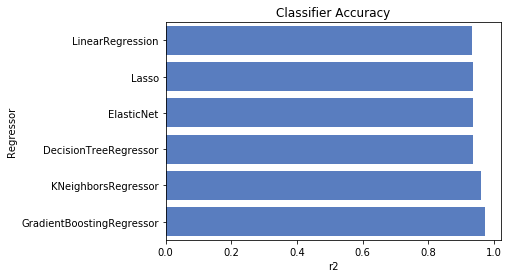

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

from joblib import parallel_backend
from sklearn.model_selection import cross_validate

log_cols = ["Regressor", "r2"]
log = pd.DataFrame(columns=log_cols)



acc_dict = {}



for reg in regressors:
    name = reg.__class__.__name__
    
    acc = cross_validate(reg, X, y, scoring=['r2', 'neg_mean_squared_error'], cv=3, n_jobs=-1)
    if name in acc_dict:
        acc_dict[name] += acc
    else:
        acc_dict[name] = acc

for reg in acc_dict:
    log_entry = pd.DataFrame([[reg, acc_dict[reg]['test_r2'].mean()]], columns=log_cols)
    log = log.append(log_entry)

print(log)

plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='r2', y='Regressor', data=log, color="b")

In [31]:
dataset.head()

,robot_gear_compression_diff_1,weapon_robot_armour_index_2,robot_gear_compression_diff_3,robot_gear_compression_diff_4,weapon_robot_punch_right_1,robot_gear_compression_diff_6,robot_gear_compression_diff_7,robot_gear_compression_diff_8,robot_gear_compression_diff_9,robot_gear_compression_diff_10,...,robot_probe_temperature_5,robot_probe_temperature_6,robot_probe_temperature_7,robot_probe_temperature_8,robot_probe_temperature_9,weapon_robot_eye_laser_range_1,weapon_robot_punch_left_4,weapon_robot_punch_left_2,gamma_ray,target
0,14.160901,14.414612,16.384035,32.406684,13.459421,12.543409,14.473740,13.049883,8.686793,24.182690,...,-19.097848,3.908612,1.096438,3.099624,1.450245,1.809408,-16.430498,-23.151273,2,15.245773
1,15.306680,15.081165,17.836999,41.038436,19.881229,13.457171,18.982765,17.235560,35.635496,17.815459,...,7.853750,4.025115,0.919274,3.310447,2.159131,1.508607,-17.623715,-21.246749,2,12.016917
2,13.281951,15.395176,15.185231,-9.369534,5.616940,6.430563,11.464746,1.300083,-33.388864,36.116248,...,-2.946590,-6.177928,-1.148505,3.068999,1.508929,1.380151,-20.202943,3.944899,1,19.598621
3,3.703280,2.022945,7.565287,45.736451,-3.755042,1.727761,0.275604,3.161547,76.131956,6.240551,...,8.273146,6.324698,1.359472,2.917735,1.425144,1.597418,-0.371365,-2.028378,3,7.277654
4,15.322814,16.598212,16.980161,6.243812,8.587469,9.613231,14.141506,5.757895,-29.585490,32.829429,...,4.655910,2.436020,1.605216,3.346640,1.922143,1.932715,-17.373704,16.497439,1,18.426355


In [57]:
X_train, X_test = X[600:], X[:600]
y_train, y_test = y[600:], y[:600]

gbr_reg = GradientBoostingRegressor()
gbr_reg.fit(X, y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [72]:
y_preds = gbr_reg.predict(X_test)
y_preds

array([-4.79185611e-01,  4.48631071e+00,  1.80536385e+01, -4.84349642e+00,
       -8.03845812e+00, -8.46306884e+00,  2.69562974e+00,  1.84022582e+01,
       -1.26310692e+01, -5.50327778e+00,  1.43798754e+01, -1.45020483e+01,
       -1.03698126e+01, -1.10406093e+01,  1.62052522e+01,  1.70361967e+01,
        1.84703429e+01, -2.40273084e+00, -4.57156892e+00,  1.18188706e+01,
        9.66859670e+00, -1.61958388e+01,  6.52175534e+00, -3.46128265e+00,
        1.82333446e+01, -2.63167614e-01,  9.08273554e+00,  1.54226733e+01,
       -1.85383389e+00,  1.77468982e+01,  1.67277908e+01, -1.36219570e+01,
        1.51249822e+01, -2.72984618e+00, -2.25952921e+01,  1.65545948e+01,
       -2.09267281e+02,  1.92289110e+01,  1.71847900e+01, -5.71359524e+00,
        1.87096705e+01,  8.78386545e+00,  1.48293206e+01,  1.76927710e+01,
       -1.46200144e+01,  2.97141830e+00, -9.55661627e+00,  1.10267601e+01,
        1.56182970e+01,  1.96874943e+01,  1.42145364e+01,  1.66933972e+01,
        8.60419195e-01, -

In [56]:
gbr_reg.score(X_test, y_test)

0.9543031589034244

# submit gbr

In [63]:
subm = pd.read_csv('./robot_data/test_data.csv')
years = subm['year']
subm = subm.drop(columns=['year'])

In [64]:
encode_gamma = {'low': 0, 'moderate': 0.25, 'high': 0.5, 'very high': 0.75}
subm['gamma_ray'] = subm['gamma_ray'].map(encode_gamma)
subm.head()

,robot_gear_compression_diff_1,weapon_robot_armour_index_2,robot_gear_compression_diff_3,robot_gear_compression_diff_4,weapon_robot_punch_right_1,robot_gear_compression_diff_6,robot_gear_compression_diff_7,robot_gear_compression_diff_8,robot_gear_compression_diff_9,robot_gear_compression_diff_10,...,robot_probe_temperature_5,robot_probe_temperature_6,robot_probe_temperature_7,robot_probe_temperature_8,robot_probe_temperature_9,weapon_robot_eye_laser_range_1,weapon_robot_punch_left_4,weapon_robot_punch_left_2,gamma_ray,target
0,-18.136584,-18.926809,-20.810190,-26.048782,-6.143792,-13.271357,-22.288341,-19.924976,-17.556931,-31.181639,...,4.094611,8.153749,2.556148,3.212842,1.454573,1.223251,15.791951,7.321099,0.5,NaN
1,-20.960127,-22.085946,-26.493563,-46.317078,-16.710923,-15.651756,-26.447869,-22.773740,-31.982001,-37.597457,...,6.222215,7.277908,0.930479,3.236609,0.868422,0.855648,18.934608,7.710661,0.5,NaN
2,-22.938643,-23.746999,-28.380429,-54.863228,-19.916516,-17.705687,-30.146180,-25.755859,-29.190648,-38.858731,...,7.060357,6.581929,1.667303,3.092737,1.268653,1.206389,19.788746,8.100223,0.5,NaN
3,-22.790936,-23.812049,-28.283436,-56.067944,-19.997358,-18.777231,-32.326135,-27.382583,-18.938983,-38.015383,...,8.559168,6.337333,-0.854167,3.055166,2.466574,1.559834,20.566138,8.489784,0.5,NaN
4,-23.167947,-24.002717,-29.013752,-57.311637,-17.371633,-18.488637,-31.337333,-25.640987,-13.643481,-37.172163,...,9.107129,6.635497,2.712196,3.124018,1.860862,1.660488,20.666446,8.879346,0.5,NaN


In [65]:
subm = subm.drop(columns=['target'])

In [79]:
from sklearn.preprocessing import StandardScaler

X = subm.values[0::, :-1:]
print(X)
#scaler = StandardScaler()

X = scaler.transform(X)
X = np.c_[(X, subm.values[0::, -1])]
X

[[-18.13658395 -18.92680929 -20.81018954 ...   1.22325084  15.79195121
    7.32109938]
 [-20.96012696 -22.08594638 -26.49356254 ...   0.85564766  18.93460848
    7.71066095]
 [-22.93864322 -23.74699944 -28.38042925 ...   1.20638949  19.78874594
    8.10022253]
 ...
 [-18.14406979 -20.41900817 -13.40512205 ...   0.88499413   1.23598421
  -22.28558028]
 [-14.97181659 -17.51376614  -9.15688244 ...   1.29906256   0.96225142
  -22.28558028]
 [-12.44274379 -15.04469792  -4.6413083  ...   1.72420026  -0.16085281
  -22.28558028]]


array([[-1.91148132, -1.87628915, -1.61954698, ...,  1.45054592,
         0.26751065,  0.5       ],
       [-2.14737109, -2.12704874, -1.98831026, ...,  1.69104085,
         0.27547456,  0.5       ],
       [-2.31266403, -2.25889645, -2.11073881, ...,  1.75640456,
         0.28343847,  0.5       ],
       ...,
       [-1.91210672, -1.99473389, -1.13907228, ...,  0.33663628,
        -0.33774653,  0.75      ],
       [-1.64708435, -1.76412747, -0.86342703, ...,  0.31568861,
        -0.33774653,  0.75      ],
       [-1.43579577, -1.56814277, -0.5704359 , ...,  0.22974196,
        -0.33774653,  0.75      ]])

In [80]:
y_pred = gbr_reg.predict(X)

In [81]:
y_pred = y_pred.reshape(1000)
y_pred

array([-1.39849982e+01, -1.61420174e+01, -1.97447066e+01, -2.00358996e+01,
       -2.02078817e+01, -1.89748312e+01, -1.99680519e+01, -1.89986222e+01,
       -2.03994338e+01, -2.04121073e+01, -2.01393374e+01, -1.97909599e+01,
       -1.88535909e+01, -1.29943142e+01, -1.20826249e+01, -9.05062894e+00,
       -1.01245025e+01, -1.15429165e+01, -7.57704072e+00, -1.31449870e+01,
       -9.85681130e+00, -2.06701342e+01, -2.69297382e+01, -2.99793148e+01,
       -2.65170845e+01, -2.81984744e+01, -2.97745042e+01, -3.86563509e+01,
       -3.47406664e+01, -3.29887626e+01, -1.93037188e+01, -2.29396633e+01,
       -1.94258802e+01, -1.98231533e+01, -1.98243153e+01, -2.05707538e+01,
       -1.97835297e+01, -1.89758994e+01, -1.73786466e+01, -1.80430912e+01,
       -1.22431099e+01, -1.63564649e+01, -1.58397995e+01, -1.71088266e+01,
       -9.95523294e+00, -9.70358205e+00, -9.43882202e+00, -9.07272285e+00,
       -1.14066482e+01, -1.27184116e+01, -1.39797602e+01, -1.45075405e+01,
       -1.30917993e+01, -

In [82]:
d = {'year': years.values, 'target': y_pred}
ans = pd.DataFrame(d)
ans = ans.set_index('year')

In [83]:
ans.to_csv('submission_gbr_1.csv')